In [314]:
import numpy as np
import matplotlib.pyplot as plt

In [315]:
def geneticAlgorithm(n, g, pR, pM, nCols): #Population Size, # of generations, P(reproduction), p(Mutation), # of queens
    population = np.array([np.random.permutation(nCols) for i in range(n)])
    bestIndividual, bestFitness = np.zeros(nCols), float('-inf')
    for individual in population:
        if (newFitness := fitness(individual)) > bestFitness:
            bestFitness = newFitness
            bestIndividual = individual
    for i in range(g):
        if bestFitness == nCols:
            return bestIndividual
        bestNewFitness = float('-inf')
        for childIndex in range(n):
            if childIndex + 1 == n and bestNewFitness < bestFitness: #TODO: Use inverse tournament
                population[childIndex] = bestIndividual
                continue
            pOne = population[tournamentSelection(population)]
            pTwo = population[tournamentSelection(population)]
            parents = np.array([pOne, pTwo])
            #parents = [rouletteSelection(population), rouletteSelection(population)]
            newChild = simplePermutationCrossover(pR, parents, nCols)
            #newChild = partiallyMappedCrossover(parents)
            newChild = mutation(pM, newChild)
            population[childIndex] = newChild
            bestNewFitness = max(bestNewFitness, fitness(newChild))
    return bestIndividual

In [323]:
def fitness(solution):
    goodQueens = len(solution)
    for i, queenOne in enumerate(solution[: -1]):
        for j, queenTwo in enumerate(solution[i + 1:]):
            if abs(j - 1) == abs(queenOne - queenTwo):
                goodQueens -= 1
    return goodQueens

In [317]:
def tournamentSelection(population, k = 2):
    participants = np.random.choice(len(population), k, False)
    results = [fitness(population[i]) for i in participants]
    return np.argmax(results)

In [318]:
def simplePermutationCrossover(pR, parents, nQueens):
    if np.random.rand() > pR:
        return parents[0] if fitness(parents[0]) > fitness(parents[1]) else parents[1]
    cuttingPoint = np.random.randint(1, len(parents[0]) - 2)
    child = np.concatenate((parents[0,: cuttingPoint], parents[1, cuttingPoint:]))
    setChild = set(child)
    repeated = set(parents[0,1: cuttingPoint]).intersection(set(parents[1, cuttingPoint: -1]))
    missing = set(np.arange(nQueens)).difference(setChild)
    if len(repeated):
        for i in range(len(child)):
            if child[i] in repeated:
                repeated.remove(child[i])
                child[i] = missing.pop()          
    return child 

In [319]:
def mutation(pM, individual):
    if np.random.rand() > pM:
        return individual
    toSwap = np.random.choice(len(individual), 2, False)
    individual[toSwap[0]], individual[toSwap[1]] = individual[toSwap[1]], individual[toSwap[0]]
    return individual

In [320]:
def plotSolution(individual):
    boardSize = len(individual)
    chessboard = np.zeros((boardSize, boardSize))

    chessboard[1::2, 0::2] = 1
    chessboard[0::2, 1::2] = 1

    plt.imshow(chessboard, cmap='binary')
    for i in range(len(individual)):
      plt.text(i, individual[i], '♕', fontsize=25, ha='center', va='center', color='black' if (i - individual[i] ) % 2 == 0 else 'white')
    plt.show()

[4 7 0 2 5 3 6 1] 8


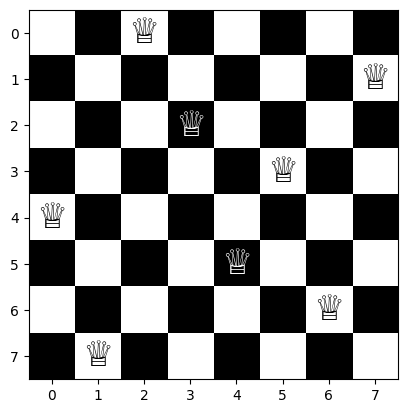

In [333]:
sol = geneticAlgorithm(10, 50, 0.5, 0.5, 8)
print(sol, fitness(sol))
plotSolution(sol)